In [270]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [271]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

pd.options.plotting.backend = "plotly"


In [272]:
df = pd.read_csv('https://raw.githubusercontent.com/italia/covid19-opendata-vaccini/master/dati/somministrazioni-vaccini-latest.csv')
df.data_somministrazione = pd.to_datetime(df.data_somministrazione)

In [273]:
df.sort_values('data_somministrazione', inplace=True)

In [274]:
df.head()

,data_somministrazione,fornitore,area,fascia_anagrafica,sesso_maschile,sesso_femminile,categoria_operatori_sanitari_sociosanitari,categoria_personale_non_sanitario,categoria_ospiti_rsa,categoria_over80,categoria_forze_armate,categoria_personale_scolastico,categoria_altro,prima_dose,seconda_dose,codice_NUTS1,codice_NUTS2,codice_regione_ISTAT,nome_area
0,2020-12-27,Pfizer/BioNTech,ABR,20-29,1,0,1,0,0,0,0,0,0,1,0,ITF,ITF1,13,Abruzzo
94,2020-12-27,Pfizer/BioNTech,PIE,70-79,9,10,1,0,18,0,0,0,0,19,0,ITC,ITC1,1,Piemonte
95,2020-12-27,Pfizer/BioNTech,PIE,80-89,5,19,0,0,24,0,0,0,0,24,0,ITC,ITC1,1,Piemonte
96,2020-12-27,Pfizer/BioNTech,PIE,90+,5,15,0,0,20,0,0,0,0,20,0,ITC,ITC1,1,Piemonte
97,2020-12-27,Pfizer/BioNTech,PUG,20-29,18,33,47,0,0,0,0,0,4,51,0,ITF,ITF4,16,Puglia


In [275]:
df = df[df['data_somministrazione']>='2021-01-01']

In [276]:
#df.data_somministrazione = df.data_somministrazione.dt.strftime("%d-%m-%Y")

In [277]:
df['giorno_campagna'] = df.data_somministrazione.dt.dayofyear

In [278]:
df_pivot = (df.groupby(['data_somministrazione','fascia_anagrafica'])['prima_dose','seconda_dose'].sum().reset_index(level=0).
 pivot(columns='data_somministrazione', values='prima_dose').fillna(0))
df_pivot

/Users/admin/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



data_somministrazione,2021-01-01,2021-01-02,2021-01-03,2021-01-04,2021-01-05,2021-01-06,2021-01-07,2021-01-08,2021-01-09,2021-01-10,...,2021-03-29,2021-03-30,2021-03-31,2021-04-01,2021-04-02,2021-04-03,2021-04-04,2021-04-05,2021-04-06,2021-04-07
fascia_anagrafica,,,,,,,,,,,,,,,,,,,,,
16-19,2.0,19.0,0.0,12.0,22.0,38.0,31.0,43.0,77.0,144.0,...,298.0,323.0,388.0,439.0,436.0,338.0,203.0,349.0,337.0,87.0
20-29,926.0,3516.0,3468.0,5961.0,6810.0,6585.0,7713.0,9032.0,8891.0,7463.0,...,6272.0,5800.0,6578.0,5965.0,5484.0,3568.0,1648.0,3129.0,5094.0,1145.0
30-39,1970.0,6936.0,6135.0,12125.0,13680.0,11296.0,15118.0,15419.0,13549.0,9942.0,...,8202.0,8310.0,8595.0,7922.0,7219.0,4511.0,2291.0,4065.0,6558.0,1469.0
40-49,2441.0,8464.0,7784.0,14603.0,16678.0,12871.0,19036.0,19589.0,16458.0,11472.0,...,11887.0,11652.0,13066.0,11653.0,10695.0,7218.0,4104.0,6640.0,9990.0,2339.0
50-59,3220.0,10836.0,10103.0,19987.0,22966.0,17842.0,26428.0,26884.0,22505.0,15281.0,...,16684.0,16933.0,18643.0,16861.0,15376.0,11441.0,4824.0,9055.0,15056.0,3600.0
60-69,1698.0,6581.0,5981.0,11987.0,14154.0,11887.0,15530.0,16080.0,16973.0,10688.0,...,18194.0,20082.0,22294.0,21627.0,20226.0,17254.0,7966.0,12090.0,20220.0,5414.0
70-79,185.0,598.0,533.0,1124.0,1570.0,1698.0,2323.0,2674.0,3047.0,2223.0,...,49669.0,53197.0,55192.0,46671.0,56289.0,50826.0,37703.0,51894.0,81396.0,25772.0
80-89,283.0,803.0,597.0,1475.0,1857.0,1534.0,3139.0,3073.0,2930.0,1739.0,...,50931.0,54958.0,67947.0,65408.0,59928.0,57642.0,13585.0,37089.0,45391.0,15990.0
90+,326.0,750.0,532.0,1356.0,1802.0,1424.0,2841.0,2701.0,2434.0,1373.0,...,8582.0,9980.0,12903.0,9661.0,8953.0,7370.0,1599.0,4289.0,6500.0,1937.0


<AxesSubplot:xlabel='data_somministrazione', ylabel='fascia_anagrafica'>

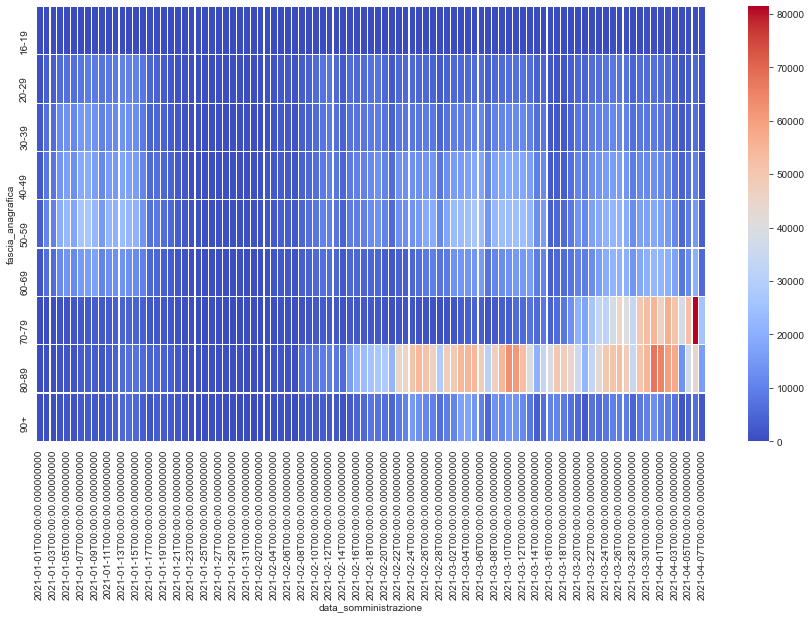

In [279]:

plt.figure(figsize=(15,8))
sns.heatmap(df_pivot, cmap='coolwarm', linecolor='white', linewidths=0.1)

In [280]:
daily = df.groupby('data_somministrazione')['prima_dose'].sum().reset_index()
df = df.merge(daily, left_on='data_somministrazione', right_on='data_somministrazione', how='inner', 
        suffixes=['','_totale_giorno'])

I need to groupby before calculating percentage as they are labelled by region as well

In [281]:
df1 = df.groupby(['data_somministrazione', 'fascia_anagrafica'])['prima_dose'].sum().reset_index(level=1).fillna(0)

In [282]:
df1 = df1.merge(daily, left_on='data_somministrazione', right_on='data_somministrazione', how='inner', 
        suffixes=['','_totale_giorno']).fillna(0)

In [283]:
df1['perc_tot_somministrati'] = (df1.prima_dose/df1.prima_dose_totale_giorno).mul(100).round(0)

In [284]:
#df1.data_somministrazione = df1.data_somministrazione.dt.strftime("%d-%m-%Y")
df1_pivot = df1.pivot(columns='data_somministrazione',index='fascia_anagrafica',values='perc_tot_somministrati').sort_index(ascending=False)

In [285]:
df_pivot

data_somministrazione,2021-01-01,2021-01-02,2021-01-03,2021-01-04,2021-01-05,2021-01-06,2021-01-07,2021-01-08,2021-01-09,2021-01-10,...,2021-03-29,2021-03-30,2021-03-31,2021-04-01,2021-04-02,2021-04-03,2021-04-04,2021-04-05,2021-04-06,2021-04-07
fascia_anagrafica,,,,,,,,,,,,,,,,,,,,,
16-19,2.0,19.0,0.0,12.0,22.0,38.0,31.0,43.0,77.0,144.0,...,298.0,323.0,388.0,439.0,436.0,338.0,203.0,349.0,337.0,87.0
20-29,926.0,3516.0,3468.0,5961.0,6810.0,6585.0,7713.0,9032.0,8891.0,7463.0,...,6272.0,5800.0,6578.0,5965.0,5484.0,3568.0,1648.0,3129.0,5094.0,1145.0
30-39,1970.0,6936.0,6135.0,12125.0,13680.0,11296.0,15118.0,15419.0,13549.0,9942.0,...,8202.0,8310.0,8595.0,7922.0,7219.0,4511.0,2291.0,4065.0,6558.0,1469.0
40-49,2441.0,8464.0,7784.0,14603.0,16678.0,12871.0,19036.0,19589.0,16458.0,11472.0,...,11887.0,11652.0,13066.0,11653.0,10695.0,7218.0,4104.0,6640.0,9990.0,2339.0
50-59,3220.0,10836.0,10103.0,19987.0,22966.0,17842.0,26428.0,26884.0,22505.0,15281.0,...,16684.0,16933.0,18643.0,16861.0,15376.0,11441.0,4824.0,9055.0,15056.0,3600.0
60-69,1698.0,6581.0,5981.0,11987.0,14154.0,11887.0,15530.0,16080.0,16973.0,10688.0,...,18194.0,20082.0,22294.0,21627.0,20226.0,17254.0,7966.0,12090.0,20220.0,5414.0
70-79,185.0,598.0,533.0,1124.0,1570.0,1698.0,2323.0,2674.0,3047.0,2223.0,...,49669.0,53197.0,55192.0,46671.0,56289.0,50826.0,37703.0,51894.0,81396.0,25772.0
80-89,283.0,803.0,597.0,1475.0,1857.0,1534.0,3139.0,3073.0,2930.0,1739.0,...,50931.0,54958.0,67947.0,65408.0,59928.0,57642.0,13585.0,37089.0,45391.0,15990.0
90+,326.0,750.0,532.0,1356.0,1802.0,1424.0,2841.0,2701.0,2434.0,1373.0,...,8582.0,9980.0,12903.0,9661.0,8953.0,7370.0,1599.0,4289.0,6500.0,1937.0


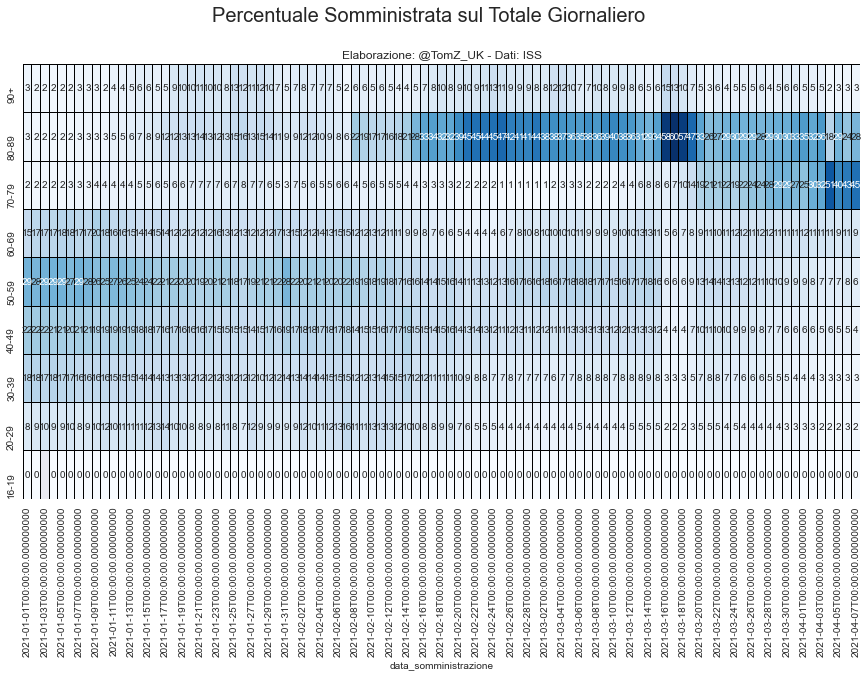

In [286]:
plt.figure(figsize=(15,8))
ax = sns.heatmap(df1_pivot, cmap='Blues'
,annot=True, linecolor='black', linewidths=0.01, cbar=False, fmt='g')
#ax.set_xticklabels(df1.data_somministrazione.dt.date)
plt.ylabel('')
#plt.xlabel(rotation=90)
plt.suptitle('Percentuale Somministrata sul Totale Giornaliero', fontsize=20)
plt.title('Elaborazione: @TomZ_UK - Dati: ISS')

plt.savefig('percentuale_totale_HM.png')

# Analisi Popolazione
Percentuale somministrazioni sul totale popolazione divisa per gruppi anagrafici

In [287]:
pd.read_html('https://www.tuttitalia.it/statistiche/popolazione-eta-sesso-stato-civile-2020/')[0]


Età Celibi/Nubili Coniugati/e   Vedovi/e Divorziati/e           Maschi  \
       Età Celibi/Nubili Coniugati/e   Vedovi/e Divorziati/e           Maschi   
0      0-4     2.264.538           0          0            0   1.163.19851,4%   
1      5-9     2.627.956           0          0            0   1.352.24051,5%   
2    10-14     2.835.060           0          0            0   1.460.44951,5%   
3    15-19     2.868.948       2.004         21           83   1.485.46551,7%   
4    20-24     2.890.840      64.253        127          668   1.549.02052,4%   
5    25-29     2.714.681     407.555        630        5.628   1.605.44451,3%   
6    30-34     2.084.313   1.169.221      2.418       26.489   1.658.74950,5%   
7    35-39     1.577.289   1.915.487      7.282       72.133   1.792.98150,2%   
8    40-44     1.393.337   2.620.552     18.957      154.618   2.089.19849,9%   
9    45-49     1.211.484   3.236.400     42.592      259.289   2.356.80049,6%   
10   50-54       914.381   3.545.692     84.717      331.914   2.404.14449,3%   
11   55-59       626.453   3.439.662    147.926      323.450   2.213.00848,8%   
12   60-64       411.731   3.006.985    230.387      244.247   1.874.92248,2%   
13   65-69       286.807   2.663.542    348.074      172.591   1.652.74047,6%   
14   70-74       225.584   2.429.874    544.701      124.201   1.555.30646,8%   
15   75-79       170.300   1.701.425    701.606       70.682   1.181.23344,7%   
16   80-84       140.403   1.162.123    888.727       40.283     930.78741,7%   
17   85-89        93.445     500.696    785.500       16.983     507.80936,4%   
18   90-94        46.534     129.439    434.772        5.615     179.13029,1%   
19   95-99        13.552      16.437    129.152        1.238      35.14121,9%   
20    100+         1.556         836     12.307          105       2.33215,8%   
21  Totale    25.399.192  28.012.183  4.379.896    1.850.217  29.050.09648,7%   

            Femmine             Totale          
            Femmine Unnamed: 7_level_1       %  
0    1.101.34048,6%          2.264.538    3,8%  
1    1.275.71648,5%          2.627.956    4,4%  
2    1.374.61148,5%          2.835.060    4,8%  
3    1.385.59148,3%          2.871.056    4,8%  
4    1.406.86847,6%          2.955.888    5,0%  
5    1.523.05048,7%          3.128.494    5,2%  
6    1.623.69249,5%          3.282.441    5,5%  
7    1.779.21049,8%          3.572.191    6,0%  
8    2.098.26650,1%          4.187.464    7,0%  
9    2.392.96550,4%          4.749.765    8,0%  
10   2.472.56050,7%          4.876.704    8,2%  
11   2.324.48351,2%          4.537.491    7,6%  
12   2.018.42851,8%          3.893.350    6,5%  
13   1.818.27452,4%          3.471.014    5,8%  
14   1.769.05453,2%          3.324.360    5,6%  
15   1.462.78055,3%          2.644.013    4,4%  
16   1.300.74958,3%          2.231.536    3,7%  
17     888.81563,6%          1.396.624    2,3%  
18     437.23070,9%            616.360    1,0%  
19     125.23878,1%            160.379    0,3%  
20      12.47284,2%             14.804    0,0%  
21  30.591.39251,3%         59.641.488  100,0%

In [288]:
pop = pd.read_html('https://it.wikipedia.org/wiki/Demografia_d%27Italia', thousands='.')[11]
pop = pop[['Età', 'Totale']]
pop.drop(index=101, axis=0, inplace=True)
pop.Totale = pd.to_numeric(pop.Totale)
pop.tail()

,Età,Totale
96,96 anni,30447
97,97 anni,22450
98,98 anni,15624
99,99 anni,10192
100,100 anni e più,15080


In [289]:
pop['Età'] = pd.to_numeric(pop['Età'].str.split(' ', expand=True)[0])

In [290]:
def ages(s):
    if (s['Età'] >= 0 and s['Età'] < 16):
        return '0-16'
    elif (s['Età'] >= 16 and s['Età'] <= 19):
        return '16-19'
    elif (s['Età'] >= 20 and s['Età'] <= 29):
        return '20-29'
    elif (s['Età'] >= 30 and s['Età'] <= 39):
        return '30-39'
    elif (s['Età'] >= 40 and s['Età'] <= 49):
        return '40-49'
    elif (s['Età'] >= 50 and s['Età'] <= 59):
        return '50-59'
    elif (s['Età'] >= 60 and s['Età'] <= 69):
        return '60-69'
    elif (s['Età'] >= 70 and s['Età'] <= 79):
        return '70-79'
    elif (s['Età'] >= 80 and s['Età'] <= 89):
        return '80-89'
    elif s['Età'] >= 90:
        return '90+'

def regrouping(s):
    if s['Età'] >= 0 | s['Età'] < 16:
        return '0-16'
    elif s['Età'] >= 16 | s['Età'] <= 19:
        return '16-19'
    elif s['Età'] >= 20 | s['Età'] <= 29:
        return '20-29'
    elif s['Età'] >= 30 | s['Età'] <= 39:
        return '30-39'
    elif s['Età'] >= 40 | s['Età'] <= 49:
        return '40-49'
    elif s['Età'] >= 50 | s['Età'] <= 59:
        return '50-59'
    elif s['Età'] >= 60 | s['Età'] <= 69:
        return '60-69'
    elif s['Età'] >= 70 | s['Età'] <= 79:
        return '70-79'
    elif s['Età'] >= 80 | s['Età'] <= 89:
        return '80-89'
    elif s['Età'] >= 90:
        return '90+'

In [291]:

pop['gruppo'] = pop.apply(ages, axis=1)

In [292]:
pop

,Età,Totale,gruppo
0,0,532991,0-16
1,1,542019,0-16
2,2,553729,0-16
3,3,561994,0-16
4,4,559203,0-16
...,...,...,...
96,96,30447,90+
97,97,22450,90+
98,98,15624,90+
99,99,10192,90+


In [293]:
pop = pop.groupby('gruppo')['Totale'].sum().reset_index()
pop.gruppo = pop.gruppo.astype(str)

In [294]:
pop

,gruppo,Totale
0,0-16,8885150
1,16-19,2310358
2,20-29,6327883
3,30-39,8345554
4,40-49,9567872
5,50-59,7871829
6,60-69,6860158
7,70-79,5628974
8,80-89,3117811
9,90+,518155


In [295]:
df1 = df1.merge(pop, left_on='fascia_anagrafica', right_on='gruppo', how='inner')
df1.drop('gruppo', axis=1, inplace=True)
df1.rename(columns={'Totale':'totale_fascia'}, inplace=True)
df1.head()

,data_somministrazione,fascia_anagrafica,prima_dose,prima_dose_totale_giorno,perc_tot_somministrati,totale_fascia
0,2021-01-01,16-19,2,11051,0.0,2310358
1,2021-01-02,16-19,19,38503,0.0,2310358
2,2021-01-04,16-19,12,68630,0.0,2310358
3,2021-01-05,16-19,22,79539,0.0,2310358
4,2021-01-06,16-19,38,65175,0.0,2310358


In [296]:
df2 = (df1.groupby(['data_somministrazione','fascia_anagrafica'])['prima_dose']
 .sum().groupby(level=0).cumsum().reset_index()
.merge(pop, left_on='fascia_anagrafica', right_on='gruppo')).drop(['gruppo'], axis=1)
df2.tail()

,data_somministrazione,fascia_anagrafica,prima_dose,Totale
867,2021-04-03,90+,160168,518155
868,2021-04-04,90+,73923,518155
869,2021-04-05,90+,128600,518155
870,2021-04-06,90+,190542,518155
871,2021-04-07,90+,57753,518155


In [297]:
df_last = df1.groupby('fascia_anagrafica')[['prima_dose','totale_fascia']].agg({'prima_dose':'sum','totale_fascia':'last'}).reset_index()

In [298]:
df_last['perc_vaccinata'] = (df_last.prima_dose/df_last.totale_fascia).mul(100).round(2)

In [299]:
df_last

,fascia_anagrafica,prima_dose,totale_fascia,perc_vaccinata
0,16-19,10761,2310358,0.47
1,20-29,444848,6327883,7.03
2,30-39,661159,8345554,7.92
3,40-49,936119,9567872,9.78
4,50-59,1219886,7871829,15.50
5,60-69,854075,6860158,12.45
6,70-79,984586,5628974,17.49
7,80-89,2358508,3117811,75.65
8,90+,531312,518155,102.54


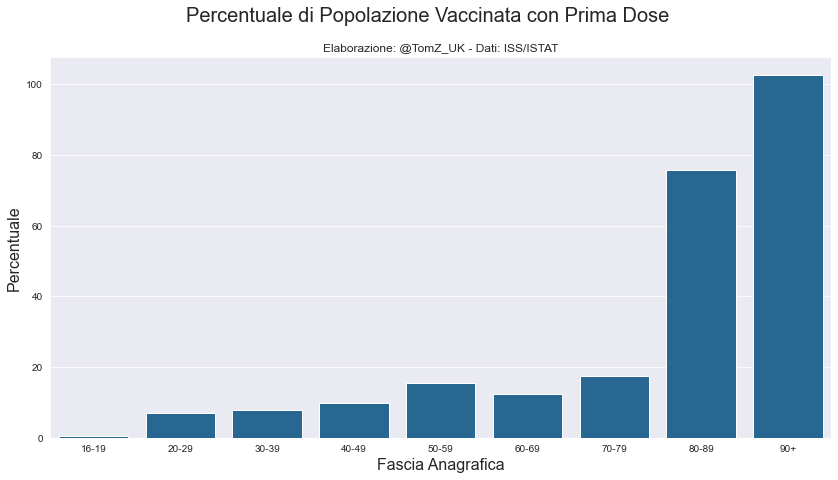

In [300]:
sns.set_style('darkgrid')
plt.figure(figsize=(14,7))
sns.barplot(data=df_last, x='fascia_anagrafica',y='perc_vaccinata', color='#176AA5').set_title('Elaborazione: @TomZ_UK - Dati: ISS/ISTAT', fontsize=12)
plt.ylabel('Percentuale', fontsize=16)
plt.xlabel('Fascia Anagrafica', fontsize=16)
plt.suptitle('Percentuale di Popolazione Vaccinata con Prima Dose', fontsize=20)

plt.savefig('Percentuale_Pop.png')

In [301]:
(df.prima_dose.sum() + df.seconda_dose.sum())

11594477

In [302]:
pop.drop(index=0, inplace=True)

In [303]:
((df.prima_dose.sum()/pop.Totale.sum())*100).round(2)

15.83

# Gauge Chart

In [304]:
df_seconda = df.groupby(df.data_somministrazione)[['seconda_dose']].sum().cumsum().reset_index()
df_seconda.seconda_dose.diff()

0         NaN
1         0.0
2         0.0
3         0.0
4         0.0
       ...   
92    57075.0
93    19806.0
94    37035.0
95    71687.0
96    31924.0
Name: seconda_dose, Length: 97, dtype: float64

df.groupby(['data_somministrazione'])['prima_dose'].sum() \
  .groupby(level=1).cumsum().reset_index()

In [305]:
df_prima = df.groupby('data_somministrazione')[['prima_dose']].sum().cumsum().reset_index()

In [306]:
pop.Totale.sum()

50548594

In [307]:
df_prima['pct_pop_prima_dose'] = (df_prima.prima_dose/pop.Totale.sum()).mul(100)

In [308]:
df_prima['daily_change'] = df_prima.pct_pop_prima_dose.diff()

In [309]:
df_prima['prima_dose_giorno'] = df_prima.prima_dose.diff().fillna(0)
df_prima

,data_somministrazione,prima_dose,pct_pop_prima_dose,daily_change,prima_dose_giorno
0,2021-01-01,11051,0.021862,NaN,0.0
1,2021-01-02,49554,0.098032,0.076170,38503.0
2,2021-01-03,84687,0.167536,0.069503,35133.0
3,2021-01-04,153317,0.303306,0.135770,68630.0
4,2021-01-05,232856,0.460658,0.157352,79539.0
...,...,...,...,...,...
92,2021-04-03,7550436,14.936985,0.316859,160168.0
93,2021-04-04,7624359,15.083227,0.146241,73923.0
94,2021-04-05,7752959,15.337635,0.254409,128600.0
95,2021-04-06,7943501,15.714583,0.376948,190542.0


In [310]:
fig = go.Figure(go.Indicator(
    mode = "gauge+number+delta",
    value = float(df_prima.pct_pop_prima_dose.tail(1).round(1)),
    domain = {'x': [0, 1], 'y': [0, 1]},
    title = {'text': "Percentuale Popolazione 16+ Vaccinata con Prima Dose", 'font': {'size': 24}},
    delta = {'reference': float(df_prima.pct_pop_prima_dose.iloc[-7]), 'increasing': {'color': "Green"},
            'valueformat':'.02f'},
    gauge = {
        'axis': {'range': [None, 100], 'tickwidth': 1, 'tickcolor': "darkblue"},
        'bar': {'color': "#FFBF00"},
        'bgcolor': "white",
        'borderwidth': 2,
        'bordercolor': "gray",
        'steps': [
            {'range': [0, 80], 'color': '#85C1E9'},
            {'range': [40, 60], 'color': '#85C1E9'},
            {'range': [60, 80], 'color': '#85C1E9'}],
        'threshold': {
            'line': {'color': "red", 'width': 4},
            'thickness': 0.75,
            'value': 80}}))

fig.update_layout(paper_bgcolor = "lavender", font = {'color': "darkblue", 'family': "Arial"})

fig

In [311]:
df_prima['seconda_dose_giorno'] = df_seconda.seconda_dose.diff().fillna(0)
df_prima

,data_somministrazione,prima_dose,pct_pop_prima_dose,daily_change,prima_dose_giorno,seconda_dose_giorno
0,2021-01-01,11051,0.021862,NaN,0.0,0.0
1,2021-01-02,49554,0.098032,0.076170,38503.0,0.0
2,2021-01-03,84687,0.167536,0.069503,35133.0,0.0
3,2021-01-04,153317,0.303306,0.135770,68630.0,0.0
4,2021-01-05,232856,0.460658,0.157352,79539.0,0.0
...,...,...,...,...,...,...
92,2021-04-03,7550436,14.936985,0.316859,160168.0,57075.0
93,2021-04-04,7624359,15.083227,0.146241,73923.0,19806.0
94,2021-04-05,7752959,15.337635,0.254409,128600.0,37035.0
95,2021-04-06,7943501,15.714583,0.376948,190542.0,71687.0


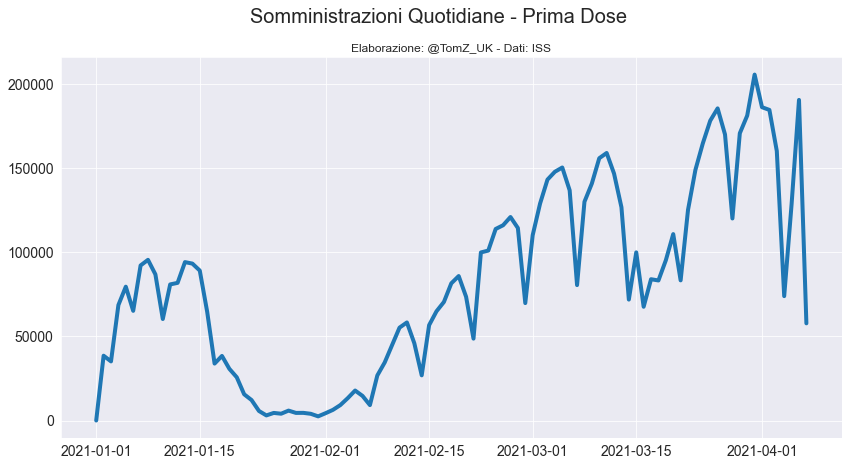

In [312]:
plt.figure(figsize=(14,7))
sns.lineplot(data=df_prima, x='data_somministrazione', y='prima_dose_giorno', 
             linewidth=4).set_title('Elaborazione: @TomZ_UK - Dati: ISS')
plt.suptitle('Somministrazioni Quotidiane - Prima Dose', fontsize=20)
plt.xlabel('')
plt.xticks(fontsize=14)
plt.ylabel('')
plt.yticks(fontsize=14)

plt.savefig('daily_first_doses.png')

In [313]:
df_pl = df_prima[['data_somministrazione','prima_dose_giorno','seconda_dose_giorno']]
df_pl.rename(columns={'prima_dose_giorno':'Prima Dose', 'seconda_dose_giorno':'Seconda Dose'}, inplace=True)
df_pl

/Users/admin/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4449: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,data_somministrazione,Prima Dose,Seconda Dose
0,2021-01-01,0.0,0.0
1,2021-01-02,38503.0,0.0
2,2021-01-03,35133.0,0.0
3,2021-01-04,68630.0,0.0
4,2021-01-05,79539.0,0.0
...,...,...,...
92,2021-04-03,160168.0,57075.0
93,2021-04-04,73923.0,19806.0
94,2021-04-05,128600.0,37035.0
95,2021-04-06,190542.0,71687.0


In [314]:
df_pl = df_pl.melt(id_vars=['data_somministrazione'])


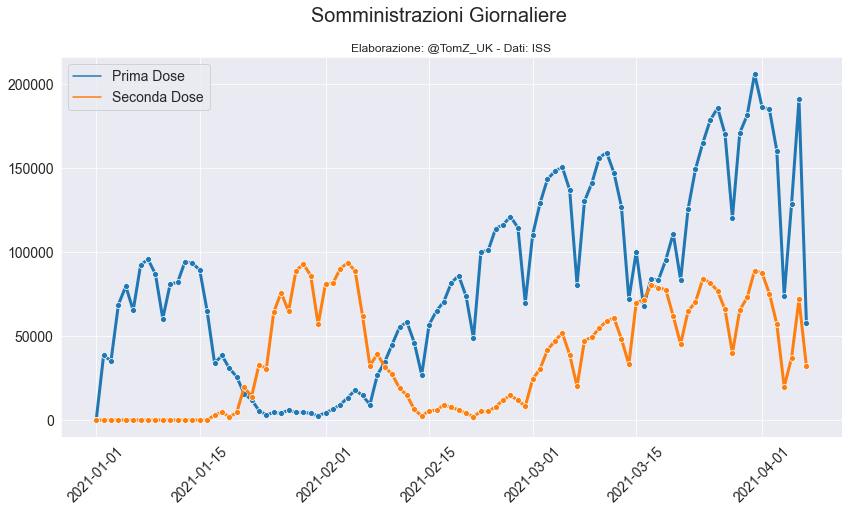

In [315]:

plt.figure(figsize=(14,7))
sns.lineplot(data=df_pl, x='data_somministrazione',y='value',hue='variable',
            linewidth=3, palette='tab10', marker='o').set_title('Elaborazione: @TomZ_UK - Dati: ISS')
plt.suptitle('Somministrazioni Giornaliere', fontsize=20)
plt.legend(fontsize=14)

plt.xlabel('')
plt.xticks(fontsize=14, rotation=45)
plt.ylabel('')
plt.yticks(fontsize=14)

plt.savefig('daily_doses.png')

# Regionale

In [316]:
df_reg = df.groupby('area')['prima_dose','seconda_dose'].sum()
df_reg

/Users/admin/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



,prima_dose,seconda_dose
area,,
ABR,180916,78342
BAS,70290,36100
CAL,200814,105147
CAM,694900,267891
EMR,665425,316593
FVG,172908,83665
LAZ,843618,342497
LIG,230391,110527
LOM,1226737,592116


In [317]:
df_reg.rename(index={'ABR':'Abruzzo','BAS':'Basilicata','CAL':'Calabria',
                    'CAM':'Campania','EMR':'Emilia-Romagna','FVG':'Friuli Venezia Giulia',
                    'LAZ':'Lazio','LIG':'Liguria','LOM':'Lombardia','MAR':'Marche','MOL':'Molise',
                    'PIE':'Piemonte','PUG':'Puglia','SAR':'Sardegna','SIC':'Sicilia','TOS':'Toscana',
                    'UMB':'Umbria','VDA':"Valle d'Aosta",'VEN':'Veneto'}, inplace=True)

In [318]:
reg = pd.read_html('https://www.tuttitalia.it/regioni/popolazione/', thousands='.')[0]
reg = reg[['Regione', 'Popolazioneresidenti']]

In [319]:
df_reg.reset_index(inplace=True)
df_reg_m = df_reg.merge(reg, left_on='area',right_on='Regione', how='inner')
df_reg_m = df_reg_m[['area','prima_dose','seconda_dose','Popolazioneresidenti']]

In [320]:
df_reg_m['pct_prima_dose'] = (df_reg_m.prima_dose / df_reg_m.Popolazioneresidenti).mul(100).round(2)
df_reg_m['pct_seconda_dose'] = (df_reg_m.seconda_dose / df_reg_m.Popolazioneresidenti).mul(100).round(2)

In [321]:
df_reg_m.rename(columns={'pct_prima_dose':'Prima Dose pct', 'pct_seconda_dose':'Seconda Dose pct'}, inplace=True)

In [322]:
reg_melt = df_reg_m.melt(id_vars='area', value_vars=['Prima Dose pct','Seconda Dose pct'])

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]),
 [Text(0, 0, 'Abruzzo'),
  Text(1, 0, 'Basilicata'),
  Text(2, 0, 'Calabria'),
  Text(3, 0, 'Campania'),
  Text(4, 0, 'Emilia-Romagna'),
  Text(5, 0, 'Friuli Venezia Giulia'),
  Text(6, 0, 'Lazio'),
  Text(7, 0, 'Liguria'),
  Text(8, 0, 'Lombardia'),
  Text(9, 0, 'Marche'),
  Text(10, 0, 'Molise'),
  Text(11, 0, 'Piemonte'),
  Text(12, 0, 'Puglia'),
  Text(13, 0, 'Sardegna'),
  Text(14, 0, 'Sicilia'),
  Text(15, 0, 'Toscana'),
  Text(16, 0, 'Umbria'),
  Text(17, 0, "Valle d'Aosta"),
  Text(18, 0, 'Veneto')])

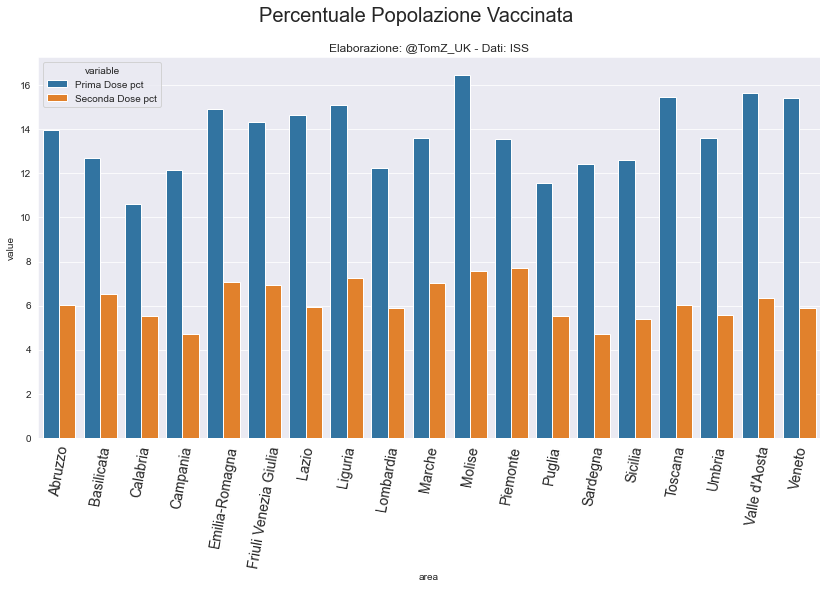

In [323]:
plt.figure(figsize=(14,7))

sns.barplot(data=reg_melt, x='area', y='value', hue='variable').set_title('Elaborazione: @TomZ_UK - Dati: ISS')
plt.suptitle('Percentuale Popolazione Vaccinata', fontsize=20)
plt.xticks(rotation=80, fontsize=14)

# Deliveries

In [324]:
deliveries = pd.read_csv('https://raw.githubusercontent.com/italia/covid19-opendata-vaccini/master/dati/consegne-vaccini-latest.csv')
deliveries.head()

,area,fornitore,numero_dosi,data_consegna,codice_NUTS1,codice_NUTS2,codice_regione_ISTAT,nome_area
0,ABR,Pfizer/BioNTech,135,2020-12-27,ITF,ITF1,13,Abruzzo
1,ABR,Pfizer/BioNTech,7800,2020-12-30,ITF,ITF1,13,Abruzzo
2,ABR,Pfizer/BioNTech,3900,2021-01-05,ITF,ITF1,13,Abruzzo
3,ABR,Pfizer/BioNTech,3900,2021-01-07,ITF,ITF1,13,Abruzzo
4,ABR,Pfizer/BioNTech,3900,2021-01-11,ITF,ITF1,13,Abruzzo


In [325]:
deliveries = deliveries.groupby(['data_consegna','nome_area','fornitore'])[['numero_dosi']].sum().reset_index()
deliveries.head()

,data_consegna,nome_area,fornitore,numero_dosi
0,2020-12-27,Abruzzo,Pfizer/BioNTech,135
1,2020-12-27,Basilicata,Pfizer/BioNTech,105
2,2020-12-27,Calabria,Pfizer/BioNTech,280
3,2020-12-27,Campania,Pfizer/BioNTech,720
4,2020-12-27,Emilia-Romagna,Pfizer/BioNTech,975


In [326]:
deliveries.nome_area.unique()

array(['Abruzzo', 'Basilicata', 'Calabria', 'Campania', 'Emilia-Romagna',
       'Friuli-Venezia Giulia', 'Lazio', 'Liguria', 'Lombardia', 'Marche',
       'Molise', 'Piemonte', 'Provincia Autonoma Bolzano / Bozen',
       'Provincia Autonoma Trento', 'Puglia', 'Sardegna', 'Sicilia',
       'Toscana', 'Umbria', "Valle d'Aosta / Vallée d'Aoste", 'Veneto'],
      dtype=object)

In [327]:
deliveries.replace({'Provincia Autonoma Trento':'PAT','Provincia Autonoma Bolzano / Bozen':'PAB',"Valle d'Aosta / Vallée d'Aoste":"Valle d'Aosta"},
                  
                 inplace=True)

In [328]:
df_reg['totale_somministrato'] = df_reg.prima_dose + df_reg.seconda_dose

In [329]:
deliveries.nome_area.unique()

array(['Abruzzo', 'Basilicata', 'Calabria', 'Campania', 'Emilia-Romagna',
       'Friuli-Venezia Giulia', 'Lazio', 'Liguria', 'Lombardia', 'Marche',
       'Molise', 'Piemonte', 'PAB', 'PAT', 'Puglia', 'Sardegna',
       'Sicilia', 'Toscana', 'Umbria', "Valle d'Aosta", 'Veneto'],
      dtype=object)

In [330]:
df_reg.merge(deliveries, left_on='area', right_on='nome_area')

,area,prima_dose,seconda_dose,totale_somministrato,data_consegna,nome_area,fornitore,numero_dosi
0,Abruzzo,180916,78342,259258,2020-12-27,Abruzzo,Pfizer/BioNTech,135
1,Abruzzo,180916,78342,259258,2020-12-30,Abruzzo,Pfizer/BioNTech,7800
2,Abruzzo,180916,78342,259258,2021-01-05,Abruzzo,Pfizer/BioNTech,3900
3,Abruzzo,180916,78342,259258,2021-01-07,Abruzzo,Pfizer/BioNTech,3900
4,Abruzzo,180916,78342,259258,2021-01-11,Abruzzo,Pfizer/BioNTech,3900
...,...,...,...,...,...,...,...,...
706,Veneto,751326,287982,1039308,2021-03-25,Veneto,AstraZeneca,21800
707,Veneto,751326,287982,1039308,2021-03-29,Veneto,Pfizer/BioNTech,83070
708,Veneto,751326,287982,1039308,2021-04-02,Veneto,Moderna,39100
709,Veneto,751326,287982,1039308,2021-04-03,Veneto,AstraZeneca,103300


In [331]:
deliveries1 = deliveries.groupby('nome_area')[['numero_dosi']].sum().reset_index()

In [332]:
del_merged = df_reg.merge(deliveries1, left_on='area', right_on='nome_area')
del_merged.drop('nome_area', axis=1, inplace=True)
del_merged['pct_somministrato'] = (del_merged.totale_somministrato/del_merged.numero_dosi).mul(100).round(2)

In [333]:
del_merged.head()

,area,prima_dose,seconda_dose,totale_somministrato,numero_dosi,pct_somministrato
0,Abruzzo,180916,78342,259258,355340,72.96
1,Basilicata,70290,36100,106390,146995,72.38
2,Calabria,200814,105147,305961,461590,66.28
3,Campania,694900,267891,962791,1280755,75.17
4,Emilia-Romagna,665425,316593,982018,1289060,76.18


In [334]:
media = np.mean(del_merged.pct_somministrato)

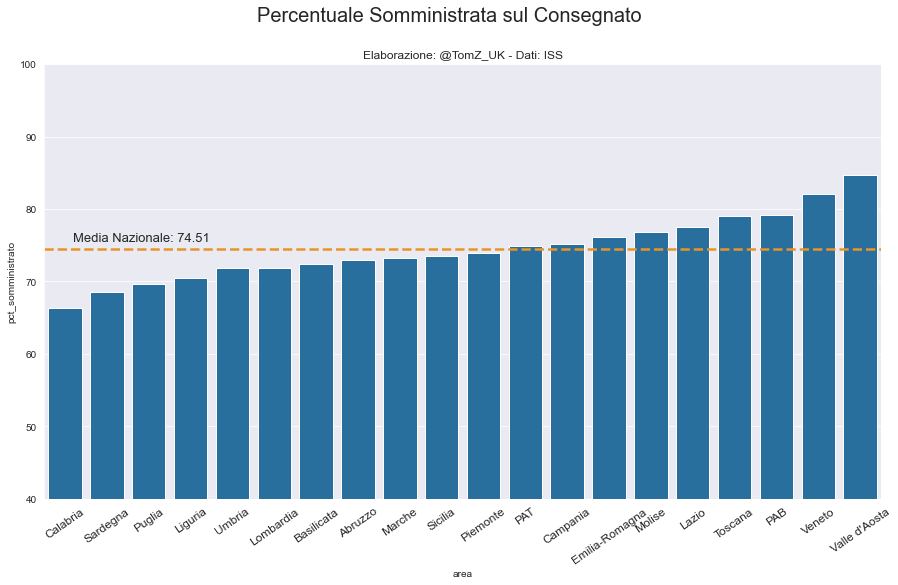

In [335]:
plt.figure(figsize=(15,8))
fig = sns.barplot(data=del_merged.sort_values('pct_somministrato'), x='area', y='pct_somministrato',
           color='#1573B2')
fig.axhline(media, ls='--', color='#E89429',
           lw=2.5)
fig.text(0.2,media+1,f'Media Nazionale: {media:.2f}',
        fontsize=13)
plt.suptitle('Percentuale Somministrata sul Consegnato', fontsize=20)
plt.title('Elaborazione: @TomZ_UK - Dati: ISS')
plt.xticks(rotation=35, fontsize=12)
plt.ylim(40,100)

plt.savefig('pct_somministrato_consegnato.png')

# Suppliers

In [336]:
df.head()

,data_somministrazione,fornitore,area,fascia_anagrafica,sesso_maschile,sesso_femminile,categoria_operatori_sanitari_sociosanitari,categoria_personale_non_sanitario,categoria_ospiti_rsa,categoria_over80,...,categoria_personale_scolastico,categoria_altro,prima_dose,seconda_dose,codice_NUTS1,codice_NUTS2,codice_regione_ISTAT,nome_area,giorno_campagna,prima_dose_totale_giorno
0,2021-01-01,Pfizer/BioNTech,SAR,60-69,8,0,8,0,0,0,...,0,0,8,0,ITG,ITG2,20,Sardegna,1,11051
1,2021-01-01,Pfizer/BioNTech,SIC,40-49,95,84,163,0,0,0,...,0,16,179,0,ITG,ITG1,19,Sicilia,1,11051
2,2021-01-01,Pfizer/BioNTech,SIC,30-39,81,85,153,0,0,0,...,0,13,166,0,ITG,ITG1,19,Sicilia,1,11051
3,2021-01-01,Pfizer/BioNTech,SIC,60-69,90,42,115,0,0,0,...,0,17,132,0,ITG,ITG1,19,Sicilia,1,11051
4,2021-01-01,Pfizer/BioNTech,SIC,20-29,63,75,132,0,0,0,...,0,6,138,0,ITG,ITG1,19,Sicilia,1,11051


In [337]:
df_fornitore = df.groupby(['fornitore', 'nome_area'])[['prima_dose','seconda_dose']].sum().reset_index()
df_fornitore['totale'] = (df_fornitore.prima_dose + df_fornitore.seconda_dose)


In [338]:
deliveries_fornitore = deliveries.groupby(['fornitore', 'nome_area'])['numero_dosi'].sum().reset_index()

In [339]:
df_fornitore.replace({'Provincia Autonoma Trento':'PAT','Provincia Autonoma Bolzano / Bozen':'PAB',"Valle d'Aosta / Vallée d'Aoste":"Valle d'Aosta"},
                  
                 inplace=True)

In [340]:
deliveries_fornitore.nome_area.unique()

array(['Abruzzo', 'Basilicata', 'Calabria', 'Campania', 'Emilia-Romagna',
       'Friuli-Venezia Giulia', 'Lazio', 'Liguria', 'Lombardia', 'Marche',
       'Molise', 'PAB', 'PAT', 'Piemonte', 'Puglia', 'Sardegna',
       'Sicilia', 'Toscana', 'Umbria', "Valle d'Aosta", 'Veneto'],
      dtype=object)

In [341]:
df3 = df_fornitore.merge(deliveries_fornitore, on=['nome_area','fornitore'],
            how='inner')[['fornitore','nome_area','totale','numero_dosi']]
df3.head()

,fornitore,nome_area,totale,numero_dosi
0,AstraZeneca,Abruzzo,48920,87900
1,AstraZeneca,Basilicata,15025,36200
2,AstraZeneca,Calabria,42091,124700
3,AstraZeneca,Campania,239948,387000
4,AstraZeneca,Emilia-Romagna,165922,286300


In [342]:
df3['pct_injected'] = (df3.totale/df3.numero_dosi).mul(100).round(2)

In [343]:
df3.head()

,fornitore,nome_area,totale,numero_dosi,pct_injected
0,AstraZeneca,Abruzzo,48920,87900,55.65
1,AstraZeneca,Basilicata,15025,36200,41.51
2,AstraZeneca,Calabria,42091,124700,33.75
3,AstraZeneca,Campania,239948,387000,62.00
4,AstraZeneca,Emilia-Romagna,165922,286300,57.95


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]),
 [Text(0, 0, 'Abruzzo'),
  Text(1, 0, 'Basilicata'),
  Text(2, 0, 'Calabria'),
  Text(3, 0, 'Campania'),
  Text(4, 0, 'Emilia-Romagna'),
  Text(5, 0, 'Friuli-Venezia Giulia'),
  Text(6, 0, 'Lazio'),
  Text(7, 0, 'Liguria'),
  Text(8, 0, 'Lombardia'),
  Text(9, 0, 'Marche'),
  Text(10, 0, 'Molise'),
  Text(11, 0, 'Piemonte'),
  Text(12, 0, 'PAB'),
  Text(13, 0, 'PAT'),
  Text(14, 0, 'Puglia'),
  Text(15, 0, 'Sardegna'),
  Text(16, 0, 'Sicilia'),
  Text(17, 0, 'Toscana'),
  Text(18, 0, 'Umbria'),
  Text(19, 0, "Valle d'Aosta"),
  Text(20, 0, 'Veneto')])

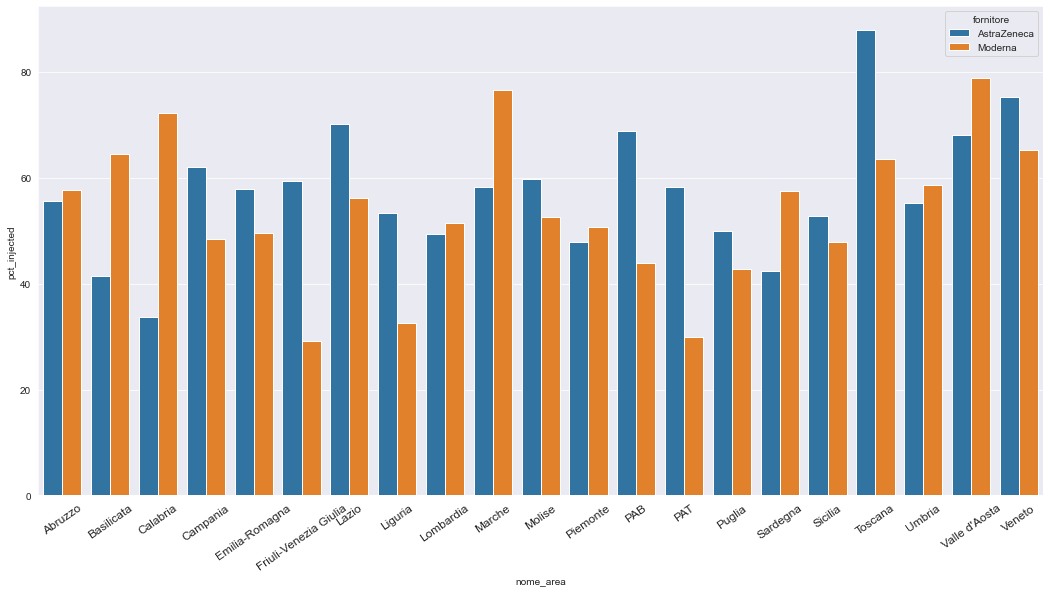

In [344]:
plt.figure(figsize=(18,9))
sns.barplot(data=df3[df3.fornitore != 'Pfizer/BioNTech'], x='nome_area',
            y='pct_injected',
            hue='fornitore')
plt.xticks(rotation=35, fontsize=12)

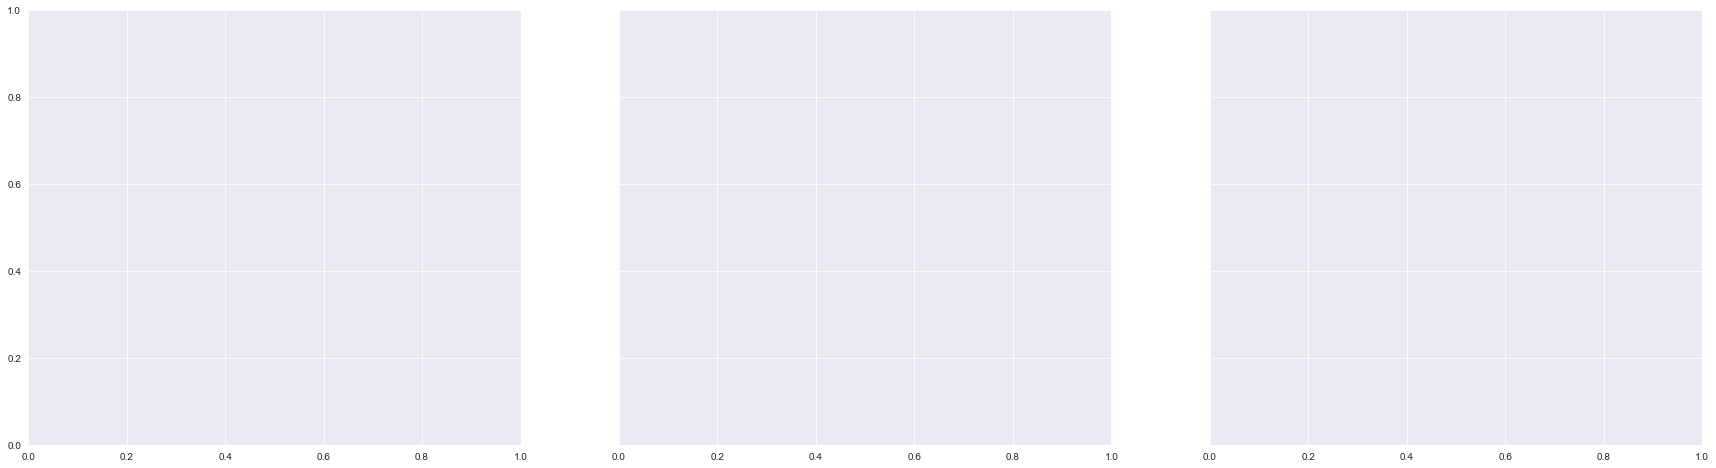

In [345]:
fig, axes = plt.subplots(1, 3, figsize=(30, 8), sharey=True)


In [346]:
df_prima

,data_somministrazione,prima_dose,pct_pop_prima_dose,daily_change,prima_dose_giorno,seconda_dose_giorno
0,2021-01-01,11051,0.021862,NaN,0.0,0.0
1,2021-01-02,49554,0.098032,0.076170,38503.0,0.0
2,2021-01-03,84687,0.167536,0.069503,35133.0,0.0
3,2021-01-04,153317,0.303306,0.135770,68630.0,0.0
4,2021-01-05,232856,0.460658,0.157352,79539.0,0.0
...,...,...,...,...,...,...
92,2021-04-03,7550436,14.936985,0.316859,160168.0,57075.0
93,2021-04-04,7624359,15.083227,0.146241,73923.0,19806.0
94,2021-04-05,7752959,15.337635,0.254409,128600.0,37035.0
95,2021-04-06,7943501,15.714583,0.376948,190542.0,71687.0


In [347]:
df_pl = df_pl.pivot(index='data_somministrazione',
            columns='variable', values='value').reset_index()
df_pl['totale'] = df_pl['Prima Dose'] + df_pl['Seconda Dose']
df_pl['mm_7'] = df_pl.totale.rolling(window=7).mean().round(0).fillna(0).astype(int)

In [351]:
df_pl['tot_cumulativo'] = df_pl.totale.cumsum()


In [354]:
df_pl.head()

variable,data_somministrazione,Prima Dose,Seconda Dose,totale,mm_7,tot_cumulativo
0,2021-01-01,0.0,0.0,0.0,0,0.0
1,2021-01-02,38503.0,0.0,38503.0,0,38503.0
2,2021-01-03,35133.0,0.0,35133.0,0,73636.0
3,2021-01-04,68630.0,0.0,68630.0,0,142266.0
4,2021-01-05,79539.0,0.0,79539.0,0,221805.0


<AxesSubplot:xlabel='data_somministrazione', ylabel='tot_cumulativo'>

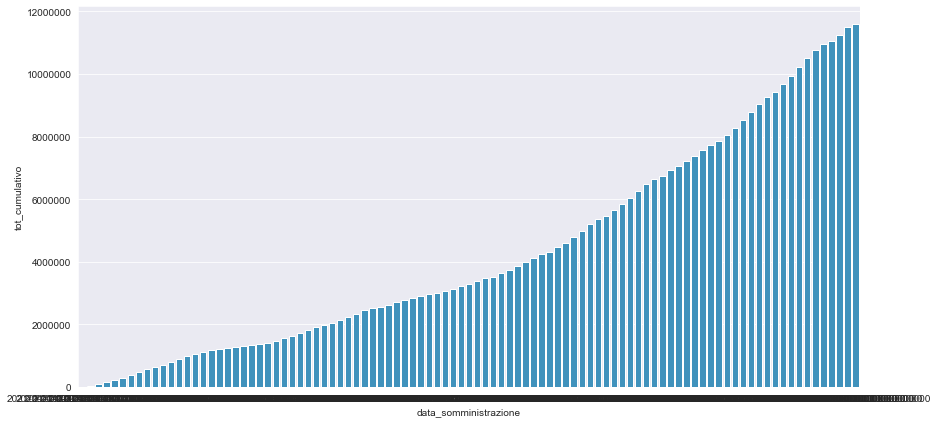

In [361]:
plt.figure(figsize=(14,7))
plt.ticklabel_format(style='plain', axis='y')

sns.barplot(data=df_pl, x='data_somministrazione', y='tot_cumulativo',
           color='#2B99D1')

<AxesSubplot:xlabel='data_somministrazione', ylabel='mm_7'>

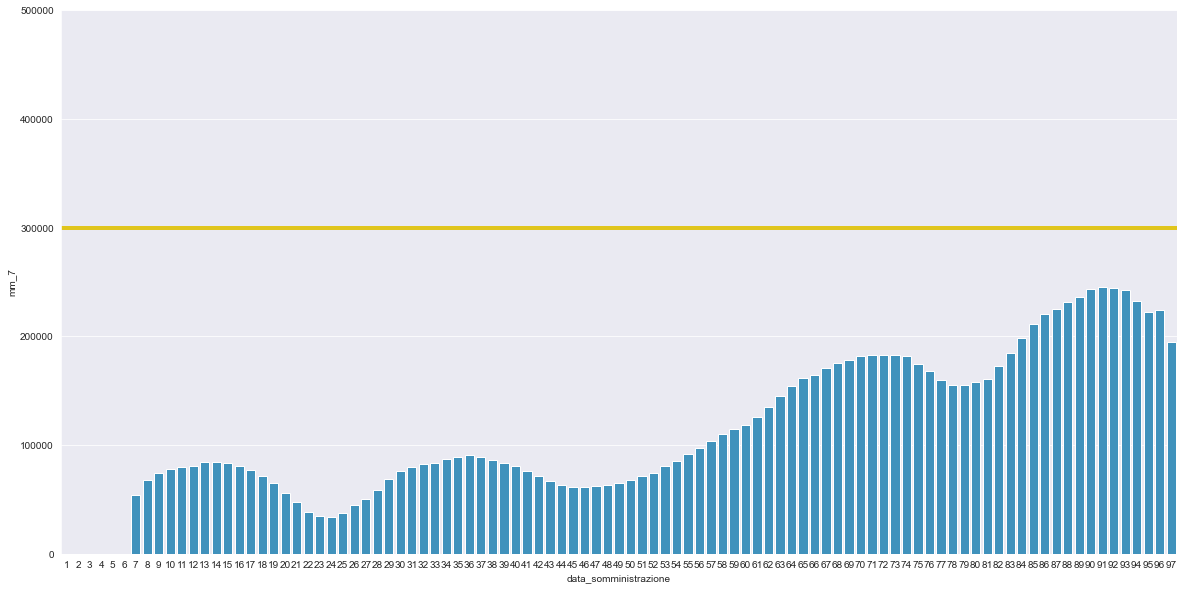

In [375]:
plt.figure(figsize=(20,10))
plt.ticklabel_format(style='plain', axis='y')
plt.xticks(rotation=0)
plt.ylim(0, 500000)
plt.plot([-1, len(df_pl)], [300000, 300000], linewidth=4, color='#E0C51D')

sns.barplot(data=df_pl, x=df_pl['data_somministrazione'].dt.dayofyear, y='mm_7',
           color='#2B99D1')

Text(0.5, 0, 'Giorni da Inizio Campagna')

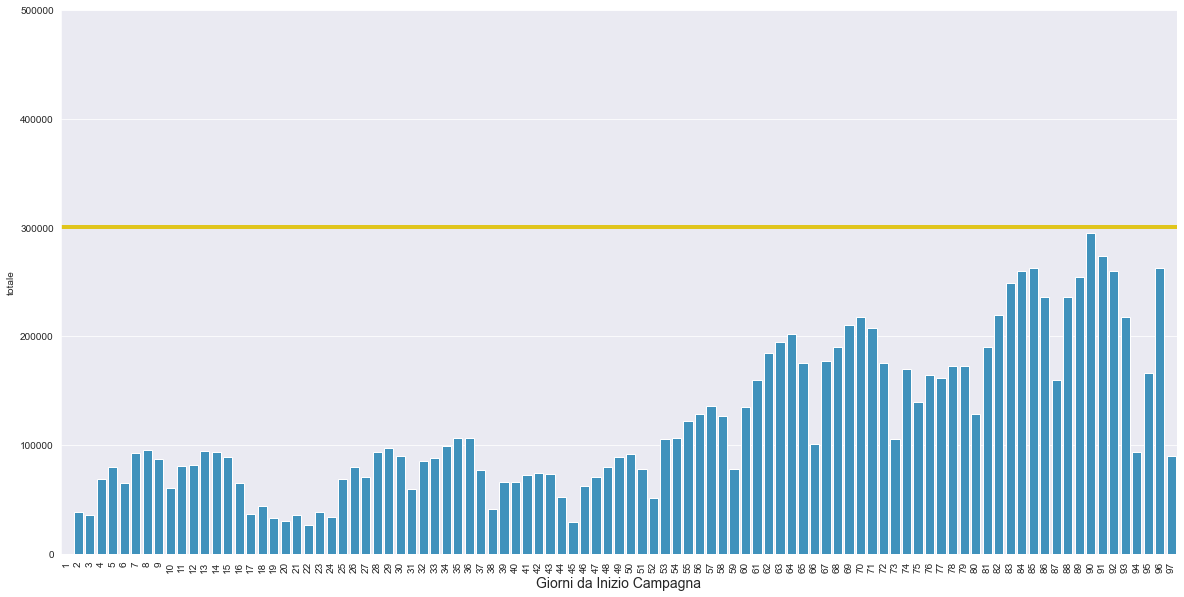

In [382]:
plt.figure(figsize=(20,10))
plt.ticklabel_format(style='plain', axis='y')
plt.xticks(rotation=90)
plt.ylim(0, 500000)
plt.plot([-1, len(df_pl)], [300000, 300000], linewidth=4, color='#E0C51D')
sns.barplot(data=df_pl, x=df_pl['data_somministrazione'].dt.dayofyear, y='totale',
           color='#2B99D1')
plt.xlabel('Giorni da Inizio Campagna', fontdict={'size':14})
